In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('/content/diabetes.csv')
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataframe.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### Explore Data Analysis

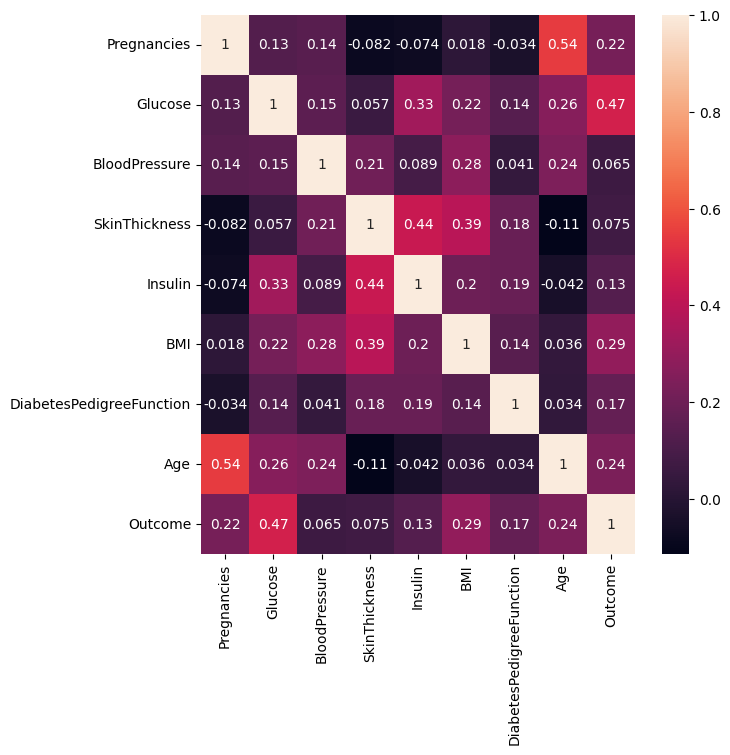

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.heatmap(dataframe.corr(), annot=True)
plt.savefig('Corelation-Analysis-Diabetes.png')
plt.show()

### Data Analysis

In [ ]:
#Through Median:  Left-skewed
sns.displot(dataframe.Pregnancies, kind='hist', kde=True)

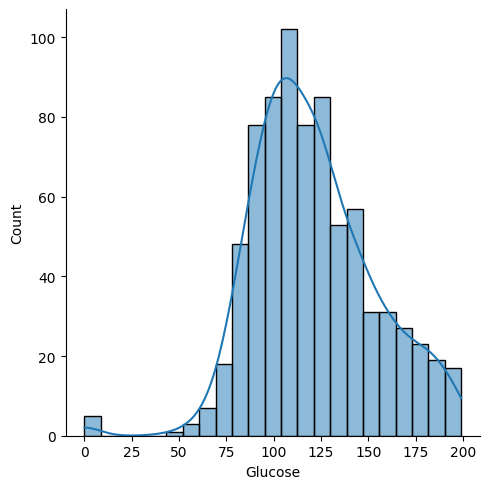

In [ ]:
#Mean
sns.displot(dataframe.Glucose, kind='hist', kde=True)

In [ ]:
#Mean- symmetric
sns.displot(dataframe.BloodPressure, kind='hist', kde=True)

In [ ]:
#Through Median:  Left-skewed
sns.displot(dataframe.Insulin, kind='hist', kde=True)

In [ ]:
#Medain
sns.displot(dataframe.DiabetesPedigreeFunction, kind='hist', kde=True)

In [ ]:
#Median
sns.displot(dataframe.Age, kind='hist', kde=True)

In [ ]:
#Mean
sns.displot(dataframe.BMI, kind='hist', kde=True)

In [ ]:
#Mean
sns.displot(dataframe.SkinThickness, kind='hist', kde=True)

# Uni-Variate Analysis

###Replace

In [ ]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
dataframe.Pregnancies = dataframe.Pregnancies.replace(0, dataframe.Pregnancies.median())
dataframe.Glucose = dataframe.Glucose.replace(0, dataframe.Glucose.mean())
dataframe.BloodPressure = dataframe.BloodPressure.replace(0, dataframe.BloodPressure.mean())
dataframe.SkinThickness = dataframe.SkinThickness.replace(0, dataframe.SkinThickness.mean())
dataframe.Insulin = dataframe.Insulin.replace(0, dataframe.Insulin.median())
dataframe.BMI = dataframe.BMI.replace(0, dataframe.BMI.mean())
dataframe.DiabetesPedigreeFunction = dataframe.DiabetesPedigreeFunction.replace(0, dataframe.DiabetesPedigreeFunction.median())
dataframe.Age = dataframe.Age.replace(0, dataframe.Age.median())

In [ ]:
dataframe.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,30.5,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,30.5,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,30.5,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.0,28.100000,0.167,21,0
4,3,137.0,40.000000,35.000000,168.0,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,30.5,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.0,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,30.5,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.0,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,30.5,31.992578,0.232,54,1


###Outliers Detect

In [ ]:
X = dataframe.drop(columns='Outcome', axis=1)
Y = dataframe['Outcome']

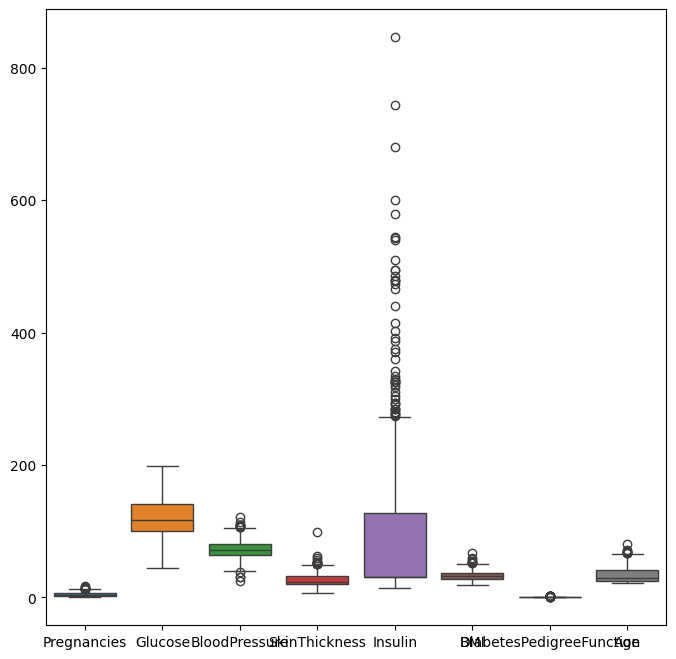

In [ ]:
fig, ax= plt.subplots(figsize=(8,8))
sns.boxplot(data=X, ax=ax)
plt.savefig('boxPlot.png')

In [ ]:
# IOR: rEmove outliers
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
  q1 = X[col].quantile(0.25)
  q3 = X[col].quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR
  mask = (X[col] >= lower_bound) & (X[col] <= upper_bound)

In [ ]:
X_outlier_detection = X[mask]
Y_outlier_detection = Y[mask]

In [ ]:
# Biases in data as each feature in diff level:  it need to be same level to avoid bias
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_outlier_detection)

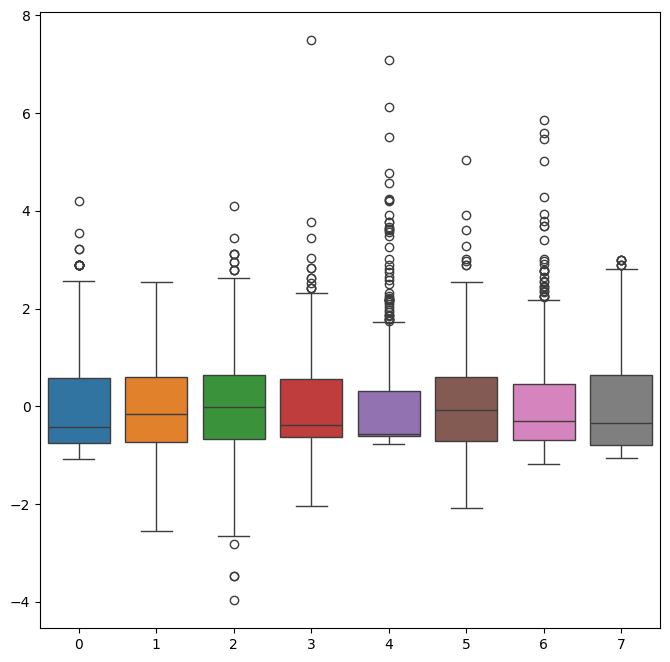

In [ ]:
fig, ax= plt.subplots(figsize=(8,8))
sns.boxplot(data=x_scaled, ax=ax)
plt.show()

In [ ]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X_scaled = pd.DataFrame(x_scaled, columns=cols)

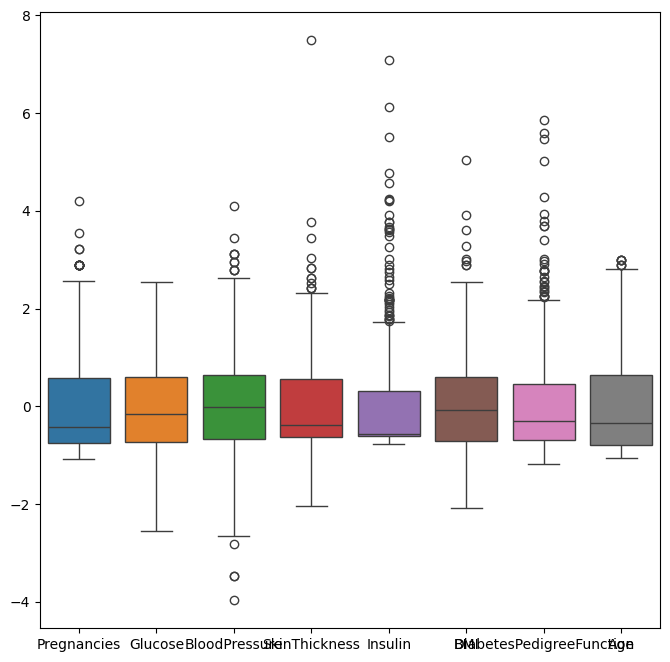

In [ ]:
fig, ax= plt.subplots(figsize=(8,8))
sns.boxplot(data=X_scaled, ax=ax)
plt.show()

In [ ]:
X_scaled.reset_index(drop=True, inplace=True)
Y_outlier_detection.reset_index(drop=True, inplace=True)

In [ ]:
q = X_scaled['Insulin'].quantile(.95) #ek particukar-val
mask = X_scaled['Insulin']<q
datanew = X_scaled[mask]
Y_outlier_detection = Y_outlier_detection[mask]

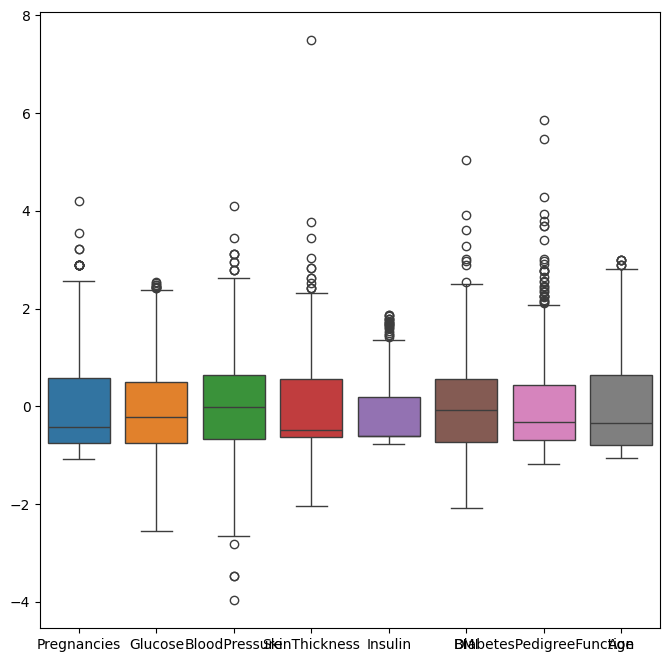

In [ ]:
fig, ax= plt.subplots(figsize=(8,8))
sns.boxplot(data=datanew, ax=ax)
plt.show()

# Bi-Variant Analysis

In [ ]:
#Model Evalution
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_test, y_predict)

0.7741935483870968

In [ ]:
target_names = ['Non-Diabetes', 'Diabetes']
print(classification_report(Y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetes       0.82      0.84      0.83       144
    Diabetes       0.67      0.64      0.66        73

    accuracy                           0.77       217
   macro avg       0.75      0.74      0.74       217
weighted avg       0.77      0.77      0.77       217



# Handle Categorical Data

In [ ]:
# One-Hot Encoding
cat_cols = dataframe.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(dataframe, columns=cat_cols, drop_first=True)

# Example 2: Label Encoding (if ordinal)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])